# Communication System

![title](block-diagram-comm-sys.PNG)

## Libraries and Constants

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import my_functions as fn
from scipy.special import erfc  # complementary error function

## Constants
#### Sampling of analog source
fs = 1000
T = 1 / fs  # s
tmax = 0.5 # Time vector
t = arange(0, tmax, T)
M = len(t) # Characteristic size 
####

## Source of Information
- Generates the *message signal* from an analog source
- Samples the analog message with a samplig frequency fs where $fs > 2 f_{max}$ of the signal
- Considers the message signal as an random process

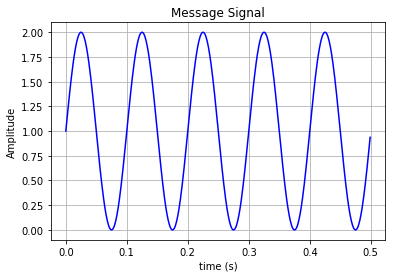

In [2]:
## Deterministic message signal - sine wave
u = fn.sineWave(t, 1, 1, 10)

fn.plotit(t, u, "Message Signal", "time (s)", "Amplitude")

## Source Encoder

- Generates the *source code word*
- Makes the binary input sequence

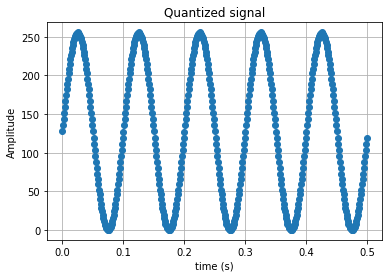

1000000010001000100100001001011110011111101001111010111110110110101111011100010011001011110100011101


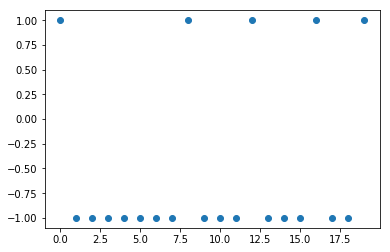

In [3]:
## Encode the sampled analog signal into a bit pattern.
# 2^8 bits codification - the first is a signal bit
b = fn.analog2binary(t, 8, u)
print(b[:100])

## Bits to signal - scaling
## 1. Binary Phase Shift Keying: the carrying wave amplitude and frequency is constant, however the phase changes
V = 1 # amplitude of the signal
uk = fn.PSK2(b, V) # output the signals (symbols)
m = 1 # 2^m discretization
plt.plot(uk[:20], 'o')

## 2. PAM Modulation
## Incoming binary symbols are first segmented into b-bit blocks. There is a mapping from the set
# of M = 2^b possible blocks into a signal constellation
# implement

# Characterization of symbol transmission
N = len(uk)             # size of the packet
R = floor( N / tmax)    # bit rate (bits/s) (transmission of information with time length fixed)
Tb = tmax / N           # bit duration # spaced instants of time that signals enters the encoder
Rs = R/m                # signals per second
Ts = 1/Rs               # signal duration (introduces a delay) (1 symbol lasts Ts seconds)
d = 10                  # waveform sampling (number of times the symbol is repeated)


## Channel Encoder (modulator)

- Generates the waveform from a sequence of symbols
- "A major objective in designing the modulator and demodulator is to maximize the
rate at which bits enter the encoder, subject to the need to retrieve the original bit stream with
a suitably small error rate. Usually this must be done subject to constraints on the transmitted
power and bandwidth. In practice there are also constraints on delay, complexity, compatibility
with standards, etc."

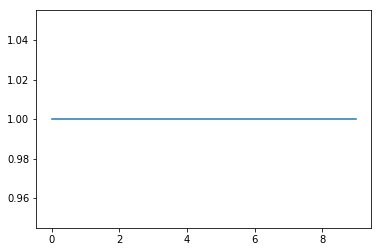

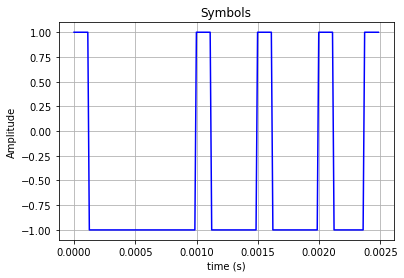

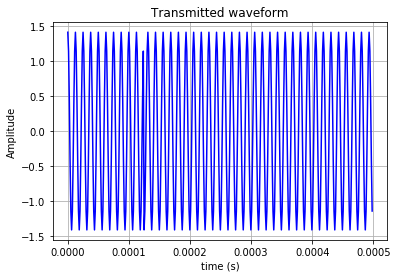

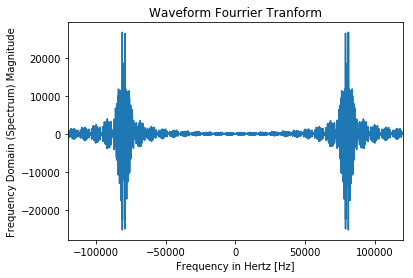

In [4]:
## Signals to waveform - Generation of modulation wave form
## waveform time definition
tw = arange(0, N*Ts, Ts/d)  # transmission time space (binary symbols) size N*d
BB = 1 / (2*Ts/d)# base band

##p = fn.pulseSignal(1, d) # pulse duration Ts
p = fn.constantSignal(1,d)
plt.plot(p)

## Expand signal to desired time
uwv = fn.pulses2waveform (N,d,p,uk)

fn.plotit(tw[:200], uwv[:200], "Symbols")

### Baseband to passband
fc = 2*BB # Hz # carrier frequency is a multiple of BB fc>BB

## Transmission time definition
interval = Ts/d
d2 = 10

tt = arange(0, N*Ts, interval/d2)
# expand uwv
uwve = empty(len(uwv)*d2)
for i in range(len(uwve)):
    uwve[i] = uwv[int(i/d2)]
    
Eb = Tb  # energy per bit (J) - chosen as Tb to normalise Psignal
Psignal = Eb / Tb  # constant and equals to 1 (linear)
phi =  sqrt(2*Psignal)*cos(2*pi*fc*tt) # basis function
x = uwve*phi
fn.plotit(tt[:400],x[:400], "Transmitted waveform") # passband wave

XF = fn.fourriertransform(x, interval/d2, fc, BB)
freq = XF[0:int(len(XF)/2)]
xhat = XF[int(len(XF)/2):]


## Channel

- Generates the *received signal*

### Information Capacity Theorem

$C = B log_2(1+SNR)$  b/s

- C is the information capacity of the channel

- B is the channel *bandwidth*

- SNR is the received *signal to noise ratio*

### Efficiency

Close to 1 is better.

$\eta = R/C$

- R is the *siganling rate*

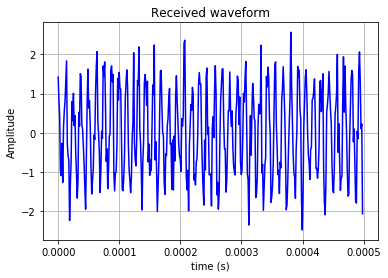

In [17]:
Wb = BB  # Noise Baseband frequency limit

### Noise - varying power
SNRdbmin = 0
SNRdbmax = 10
Eb_No_dB = arange(SNRdbmin,
                  SNRdbmax + 1)  # signal to noise ration (SNR) in (dB)
SNR = 10**(Eb_No_dB / 10.0)  # signal to noise ratio (linear)


## 1. AWGN: Additive White Gaussian Noise (zero-mean WSS Gaussian Random Process)
# base noise - Sinc expansion
sig2 = 0.5
No = 2*sig2*Tb # = Eb/SNR
mu = 0
var = No / 2  # Variance of the normal noise N(0,var) with power spectrum density No/2 = sig2*Tb
P = Psignal  # maximum channel power
C = 0.5 * log10(1 + P / var)  # channel capacity

# additive noise
z = random.normal(mu,sig2,len(x))

# Received noisy waveform
s = z + x
fn.plotit(tt[:400],s[:400], "Received waveform")


## Demodulator

- Generates the *estimate of channel code word* 

### MAP: Maximum a Posteriori estimator


### MLE: Maximum Likelihood estimator

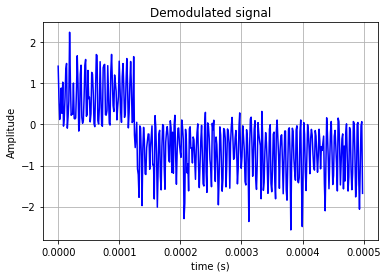

In [18]:
## demodulate to pulse form
# duration:
Tb # one bit period
# BPSK demodulation: multiply the incoming signal by 
# areference signal with frequency equal to the carrier frequency. 
# Reference signal
ref = cos(2*pi*fc*tt)
demo_s = ref*s
fn.plotit(tt[:400],demo_s[:400], "Demodulated signal")

## Channel Decoder

- Interpret the message

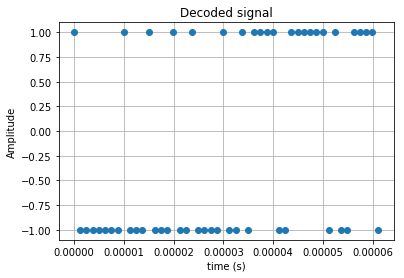

4005
4005
Bit error: 0.149812734082397 %


In [22]:
# Write in pulse form
# probe beginning in Tb/2 every Tb seconds
indexes = arange(0,size(tt), int(size(tt)/N))
demo_p = empty(size(indexes))
for i in arange(0,size(indexes),1):
    demo_p[i] = sign(demo_s[indexes[i]])

fn.scatterit(tt[:50],demo_p[:50], "Decoded signal")
print(size(uk))
print(size(demo_p))
error = sum(uk!=demo_p)/size(demo_p)
print('Bit error:',100*error, '%')

## Source Decoder

- Reconstruct the source form.

## Processing the received information
- Theoretical calculation of BER

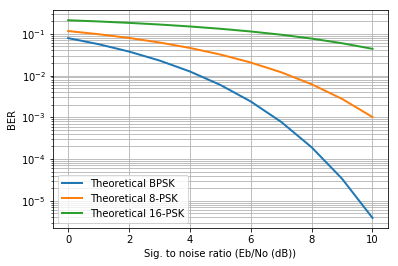

In [11]:
No = Eb/SNR

## BPSK BER Equation
BPSK = fn.Q(sqrt(2*SNR)) # bandwidth Rb

## M-PSK
# 8-PSK
PSK8 = fn.MPSK_BER(8,Eb,No)

# 16-PSK
PSK16 = fn.MPSK_BER(16,Eb,No)


plt.semilogy(Eb_No_dB, BPSK, Eb_No_dB, PSK8, Eb_No_dB, PSK16, linewidth=2)
plt.grid(True, which='both')
plt.legend(('Theoretical BPSK','Theoretical 8-PSK', 'Theoretical 16-PSK'))
plt.xlabel('Sig. to noise ratio (Eb/No (dB))')
plt.ylabel('BER')
plt.show()

## Appendix

In [9]:
# Noise frequence study

Z = z*sinc((tt-freq*Tb)/Tb)


f = 10 
f_s = 100
t = arange(0,1,1/(f_s))

x = sinc(f * 2 * np.pi * t[-1/(f_s)/2:-1/(f_s)/2])*2*f

X = fft.fft(x)
freqs = fft.fftfreq(len(x),d = 1/f_s)


fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f-10, f+10)



Zhat = fft.fft(Z)
print(Ztest)

var = No*Wb # Variance of Z
#Sz = sig2*Tb*rect(freq*Tb) # Spectral density of the noise # constant spectral density over the baseband bandwidth Wb
## Output
#xt = s + z  # Signal + noise
print(freq)

TypeError: slice indices must be integers or None or have an __index__ method